# Linear Separable Dataset

## Import Packages

In [1]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns; sns.set()

## Load some random data from sklearn dataset

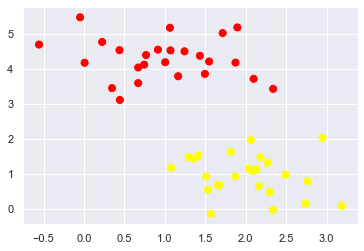

In [2]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples = 50, centers = 2, random_state = 0, cluster_std = 0.60)
# print(X)
# print(y)
plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = 'autumn')

## Which line is the best to separate these points?

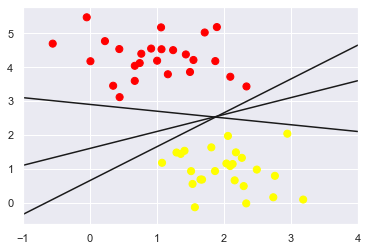

In [3]:
plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = 'autumn')     # scatter 

xfit = np.linspace(-1, 4)
for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')                                    # so many separate line

plt.xlim(-1, 4);                                                  # limit of x axis

## The line with maximum decision boundry is best

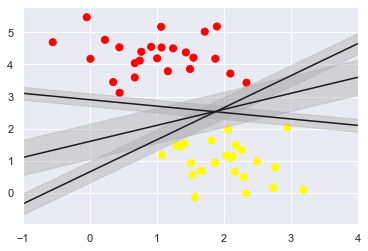

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

xfit = np.linspace(-1, 4)
for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor = 'none', color = '#AAAAAA', alpha = 0.4)

plt.xlim(-1, 4);

## Solve using a SVM classifier with linear Kernel function
Linear Kernel function means we don't make any change for dataset

In [5]:
from sklearn.svm import SVC 
model = SVC(kernel = 'linear')
model.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [6]:
def plot_svc_decision_function(model, ax = None, plot_support = True):
   
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # Plot scatter using decision_function provided by SVM
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # Plot decision boundary with dashed line
    ax.contour(X, Y, P, colors = 'k', levels = [-1, 0, 1], alpha = 0.5, linestyles = ['--', '-', '--'])
    
    # Plot support vector
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s = 300, linewidth = 1, alpha = 0.2);
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

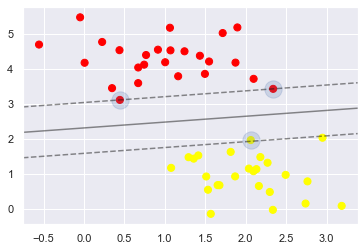

In [7]:
plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = 'autumn')
plot_svc_decision_function(model)

* There are 3 points in circles, which are exactly are on the decision boundray.
* They are the support vectors.

In [8]:
model.support_vectors_            # three support vector 

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

* It's easy to figure out we can build our model as long as we make sure the support vectors.
* Now let's try again with more data points

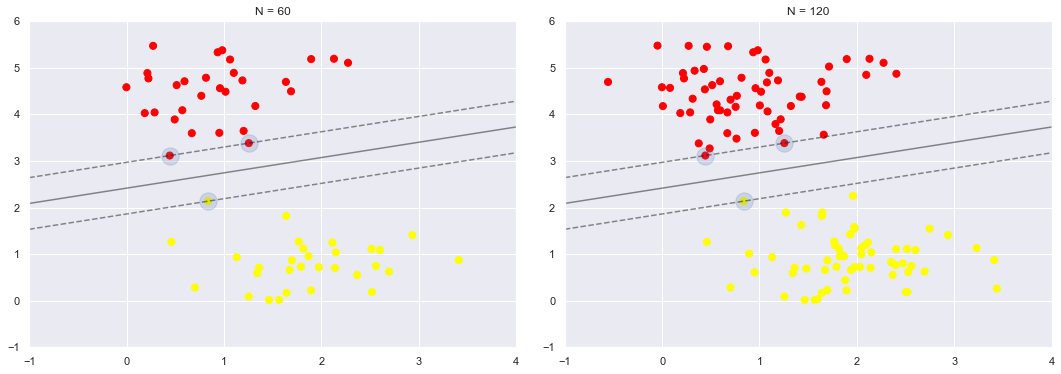

In [9]:
def plot_svm(N = 10, ax = None):
    X, y = make_blobs(n_samples = 200, centers = 2, random_state = 0, cluster_std = 0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel = 'linear', C = 1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = 'autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)
    
# Plot with different amounts of datapoints
fig, ax = plt.subplots(1, 2, figsize = (16, 6))
fig.subplots_adjust(left = 0.0625, right = 0.95, wspace = 0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

* There are 60 points in the left figure, and 120 points in the right figure.
* We can say the decision boundary is always same as long as the support vectors don't change.

# Linear Inseparable Dataset

## Linear inseparable dataset with linear Kernel function

(-1.5, 1.5)

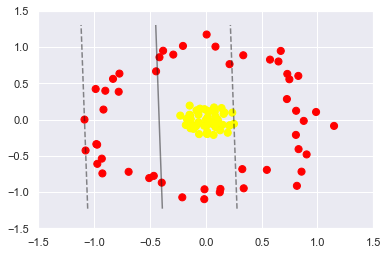

In [10]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor = 0.1, noise = 0.1)
clf = SVC(kernel = 'linear').fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = 'autumn')
plot_svc_decision_function(clf, plot_support = False);
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)

## Linear inseparable dataset with Gaussian Kernel function

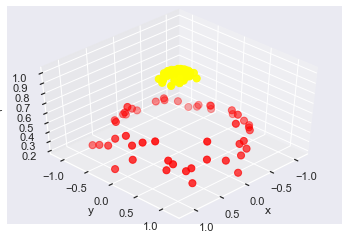

In [11]:
from mpl_toolkits import mplot3d
r = np.exp(-(X ** 2).sum(1))                                          # Add a new dimension
def plot_3D(elev = 30, azim = 30, X = X, y = y):                      # imagine to stretch 2D up and down
    ax = plt.subplot(projection = '3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c = y, s = 50, cmap = 'autumn')
    ax.view_init(elev = elev, azim = azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

plot_3D(elev = 45, azim = 45, X = X, y = y)

In [12]:
clf = SVC(kernel = 'rbf', gamma = 'scale')            # Add Gaussian Kernel Function
clf.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

(-1.5, 1.5)

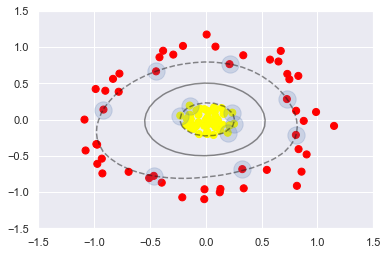

In [13]:
plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = 'autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s = 300, lw = 1, facecolors = 'none')
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)

# SVM with Soft Margin

## Parameter: C
- When C is close to positive infinity, the model will classify data accurately without error.   (including outplier)
- When C is close to negative infinity, the model will classify data allowed with some error.    (not including outplier)

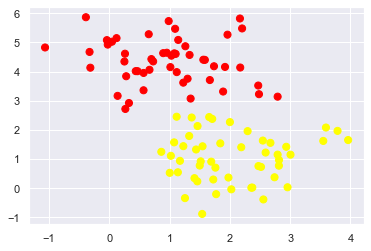

In [14]:
X, y = make_blobs(n_samples = 100, centers = 2, random_state = 0, cluster_std = 0.8)
plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = 'autumn')

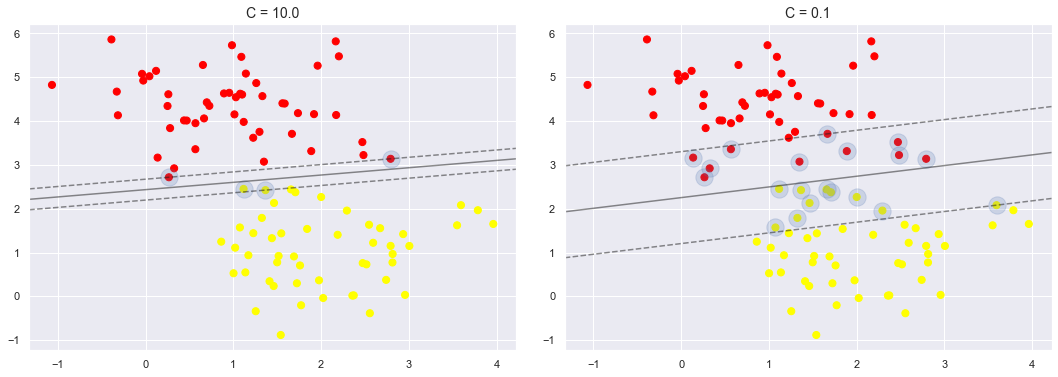

In [15]:
X, y = make_blobs(n_samples = 100, centers = 2, random_state = 0, cluster_std = 0.8)

fig, ax = plt.subplots(1, 2, figsize = (16, 6))
fig.subplots_adjust(left = 0.0625, right = 0.95, wspace = 0.1)

# Comparison for C = 10, 0.1
for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel = 'linear', C = C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = 'autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s = 300, lw = 1, facecolors = 'none');
    axi.set_title('C = {0:.1f}'.format(C), size = 14)

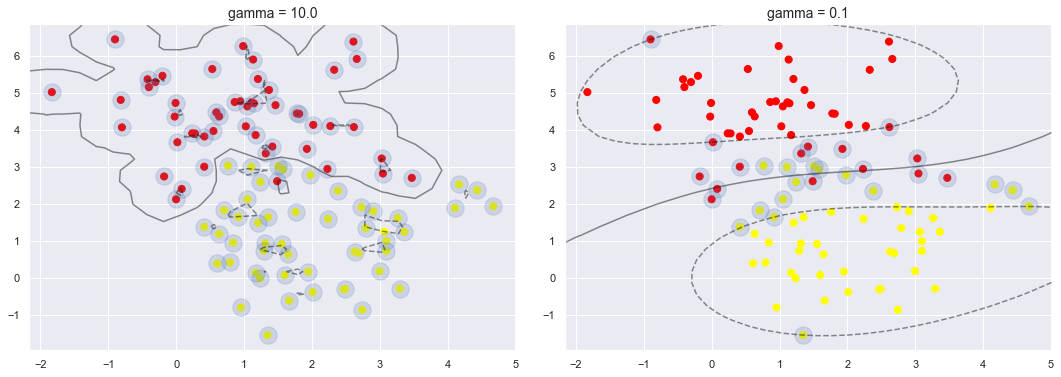

In [16]:
X, y = make_blobs(n_samples = 100, centers = 2, random_state = 0, cluster_std = 1.1)

fig, ax = plt.subplots(1, 2, figsize = (16, 6))
fig.subplots_adjust(left = 0.0625, right = 0.95, wspace = 0.1)

# Show model effect for different gammas
for axi, gamma in zip(ax, [10.0, 0.1]):
    model = SVC(kernel = 'rbf', gamma = gamma).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = 'autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s = 300, lw = 1, facecolors = 'none');
    axi.set_title('gamma = {0:.1f}'.format(gamma), size = 14)